In [2]:

## Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime
import tensorflow as tf

## Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Custom 
from elexon import ElexonRawClient
print(tf.__version__)


import IPython
import IPython.display

2.3.0


In [12]:


api = ElexonRawClient('KEY') 

# Actual Aggregated Generation per Type
#generation1 = api.Transparency.B1620(SettlementDate = '2020-01-01', Period = '5')
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
#generation2 = api.request('B1620', SettlementDate = '2020-01-01', Period = '5')

In [4]:

now = datetime.now() 
now.strftime("%Y-%m-%d")

'2020-08-20'

In [24]:
start = '2020-01-01'
end = '2020-02-01'

In [25]:
# Alternatively, use the general request() function by passing the endpoint in with the arguments:
price = api.request('DERSYSDATA',FromSettlementDate = start, ToSettlementDate = end)
dem = api.request('SYSDEM',FromDate = start, ToDate = end)

In [26]:
'''price2 = api.request('DERSYSDATA',FromSettlementDate = start,
                    ToSettlementDate = end, SettlementPeriod = '1'
                   )'''

"price2 = api.request('DERSYSDATA',FromSettlementDate = start,\n                    ToSettlementDate = end, SettlementPeriod = '1'\n                   )"

In [36]:
df_price = pd.DataFrame(price2)
df_dem = pd.DataFrame(dem)

In [37]:
df_dem

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
0,ITSDO,2020-01-01,1,27073.0,True
1,TSDF,2020-01-01,1,27395.0,True
2,ITSDO,2020-01-01,2,27612.0,True
3,TSDF,2020-01-01,2,28042.0,True
4,ITSDO,2020-01-01,3,27111.0,True
...,...,...,...,...,...
2995,TSDF,2020-02-01,10,24764.0,True
2996,TSDF,2020-02-01,11,25312.0,True
2997,ITSDO,2020-02-01,11,24622.0,True
2998,ITSDO,2020-02-01,12,24978.0,True


In [35]:
df_dem[df_dem['recordType']=='ITSDO']

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
0,ITSDO,2020-01-01,1,27073.0,True
2,ITSDO,2020-01-01,2,27612.0,True
4,ITSDO,2020-01-01,3,27111.0,True
6,ITSDO,2020-01-01,4,26311.0,True
9,ITSDO,2020-01-01,5,25693.0,True
...,...,...,...,...,...
2991,ITSDO,2020-02-01,8,23931.0,True
2992,ITSDO,2020-02-01,9,23636.0,True
2994,ITSDO,2020-02-01,10,23533.0,True
2997,ITSDO,2020-02-01,11,24622.0,True


In [38]:
df_dem[df_dem['recordType']=='TSDF']

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,demand,activeFlag
1,TSDF,2020-01-01,1,27395.0,True
3,TSDF,2020-01-01,2,28042.0,True
5,TSDF,2020-01-01,3,27890.0,True
7,TSDF,2020-01-01,4,27009.0,True
8,TSDF,2020-01-01,5,26332.0,True
...,...,...,...,...,...
2990,TSDF,2020-02-01,8,24867.0,True
2993,TSDF,2020-02-01,9,24804.0,True
2995,TSDF,2020-02-01,10,24764.0,True
2996,TSDF,2020-02-01,11,25312.0,True


In [ ]:
df_dem

In [65]:
# Number of entries
len(df_price)

2000

In [66]:
# Change to make new datetime object based on settlement period frequency (30 mins)

dates = pd.date_range(start=start,periods=len(df_price), freq='30T') 

In [67]:
df_price.index = dates

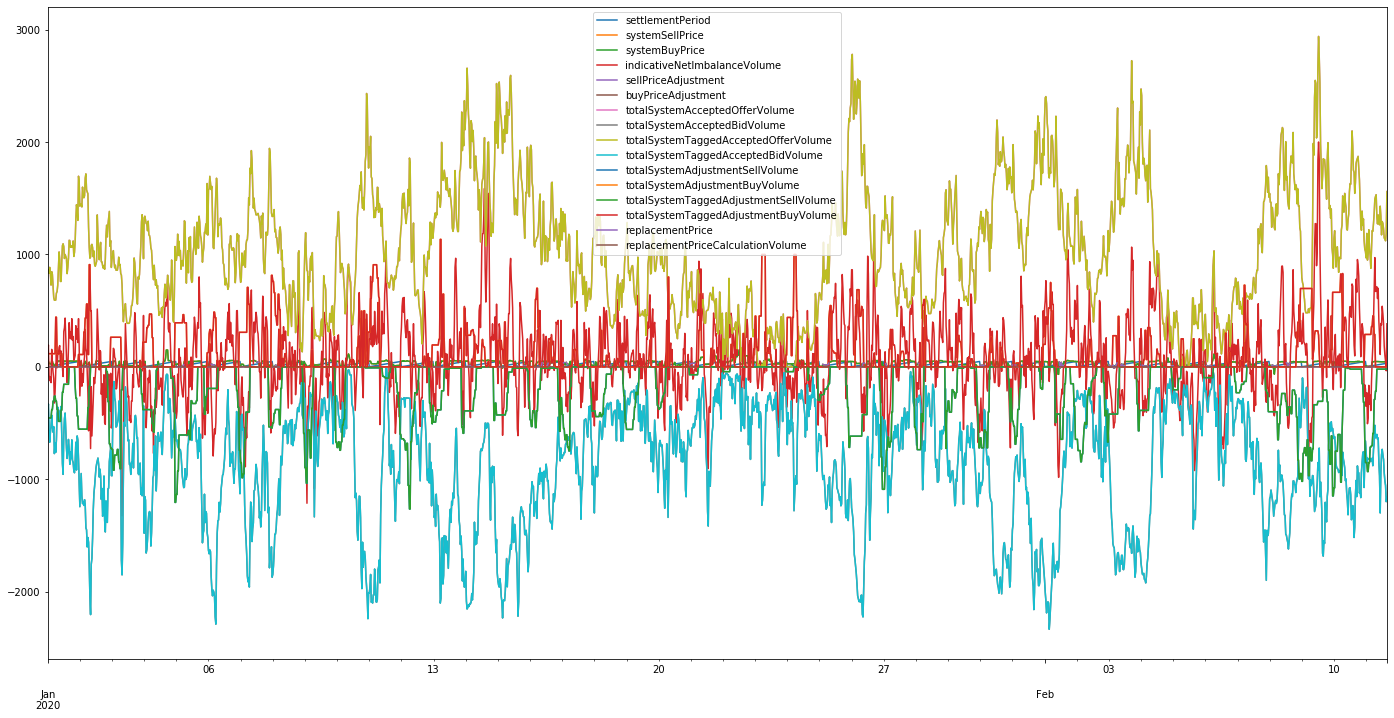

In [68]:
df_price.plot(figsize = (24,12))

In [69]:
df_prices = df_sbp = pd.concat([df_price['systemSellPrice'],
                                df_price['systemBuyPrice'],
                                df_price['indicativeNetImbalanceVolume']], 
                               axis = 1)

In [70]:
df_prices.index = dates

In [71]:
df_prices

,systemSellPrice,systemBuyPrice,indicativeNetImbalanceVolume
2020-01-01 00:00:00,50.90000,50.90000,54.3365
2020-01-01 00:30:00,51.00000,51.00000,194.7133
2020-01-01 01:00:00,29.37006,29.37006,-71.4292
2020-01-01 01:30:00,28.52000,28.52000,-122.2322
2020-01-01 02:00:00,25.78000,25.78000,-90.9042
...,...,...,...
2020-02-11 13:30:00,44.90000,44.90000,183.9288
2020-02-11 14:00:00,44.80000,44.80000,102.9414
2020-02-11 14:30:00,44.80000,44.80000,47.6092
2020-02-11 15:00:00,13.35000,13.35000,-34.6285


In [72]:
# Automatically gives latest settlement date!

# EACH SETTLEMENT PERIOD IS 30MINS

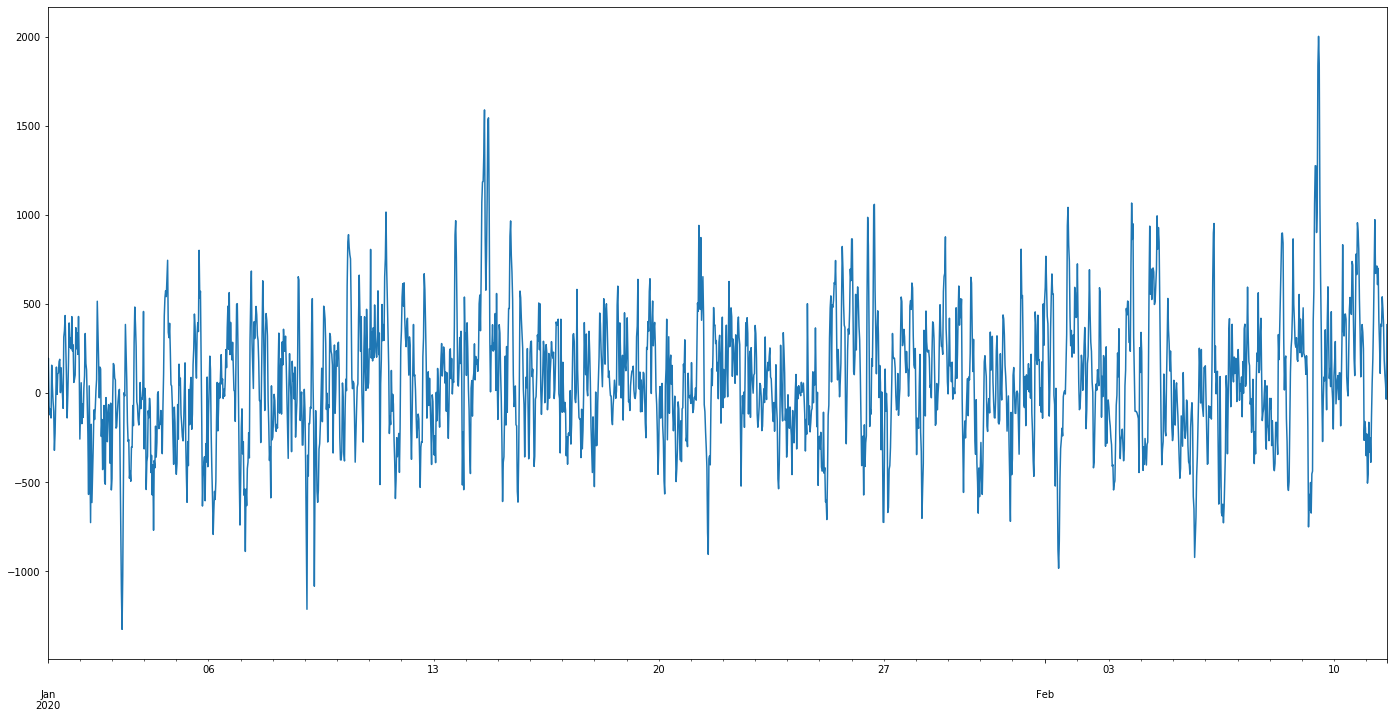

In [73]:
df_prices['indicativeNetImbalanceVolume'].plot(figsize = (24,12))

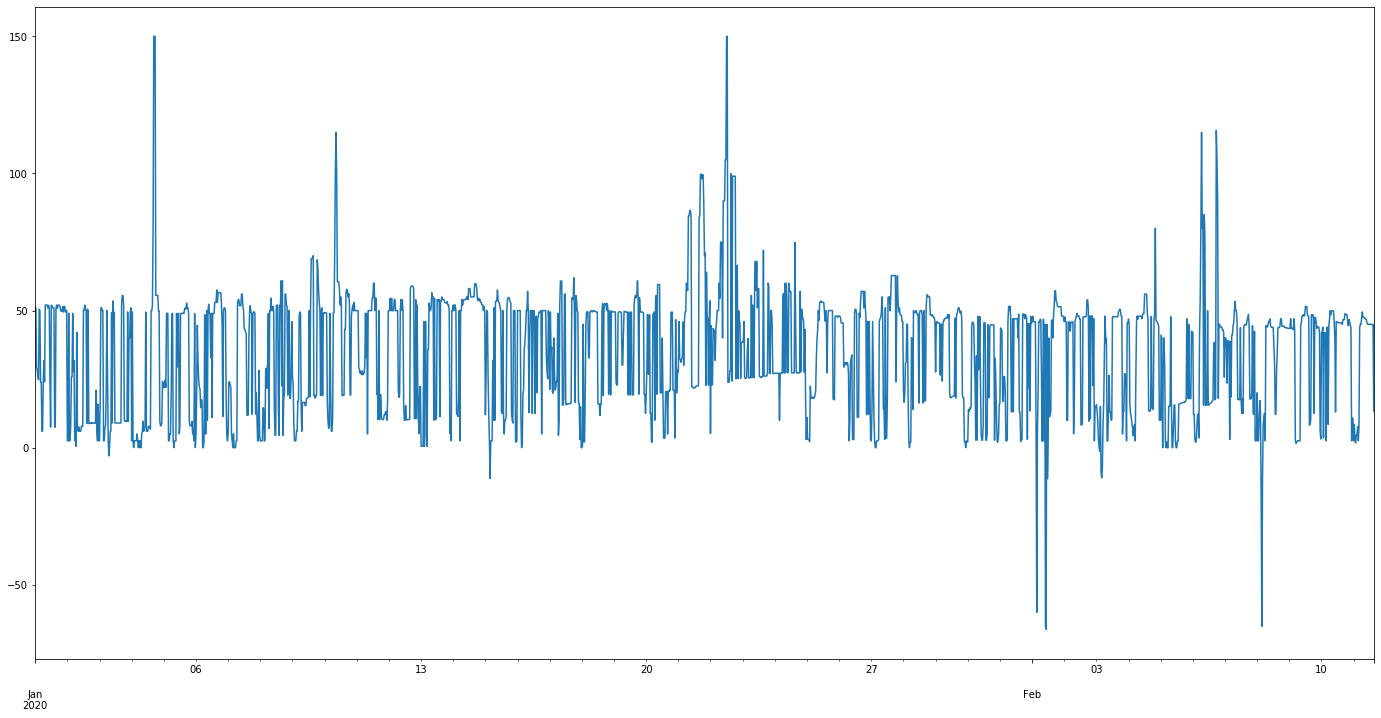

In [74]:
df_prices['systemSellPrice'].plot(figsize = (24,12))

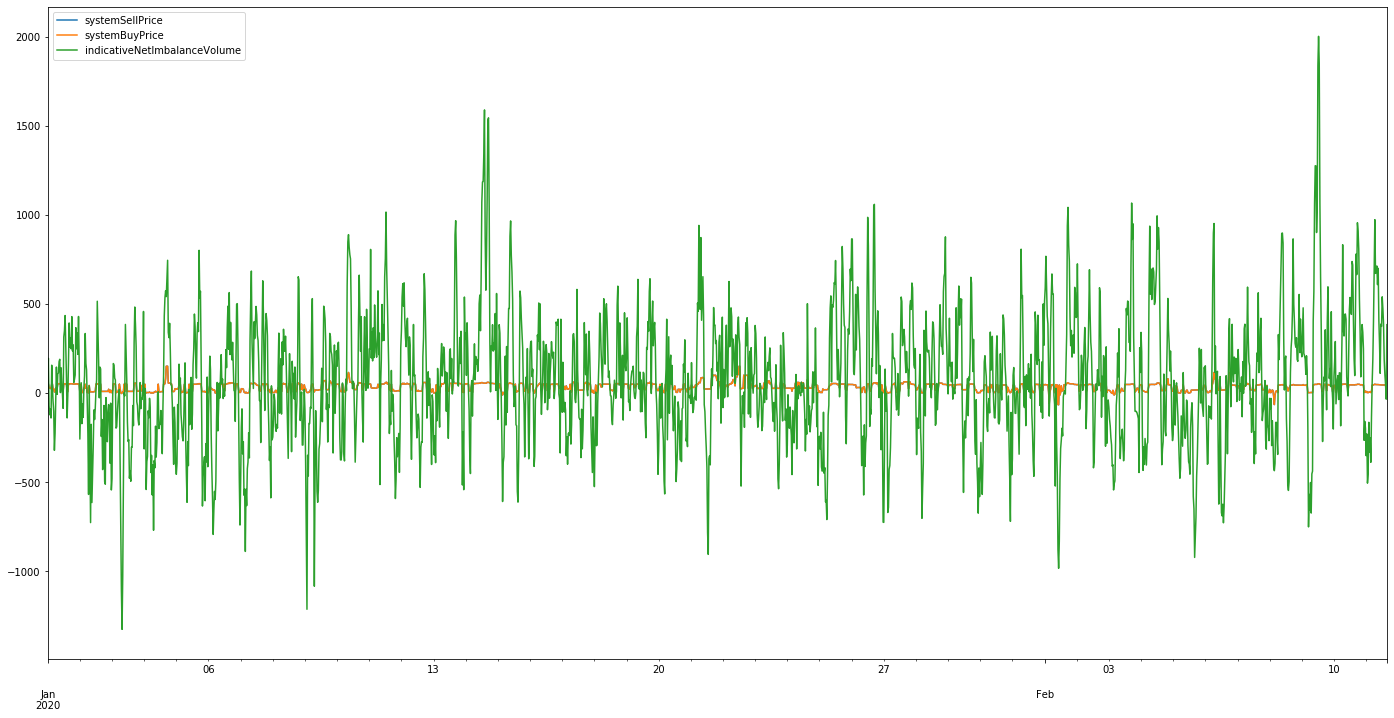

In [75]:
df_prices.plot(figsize = (24,12))

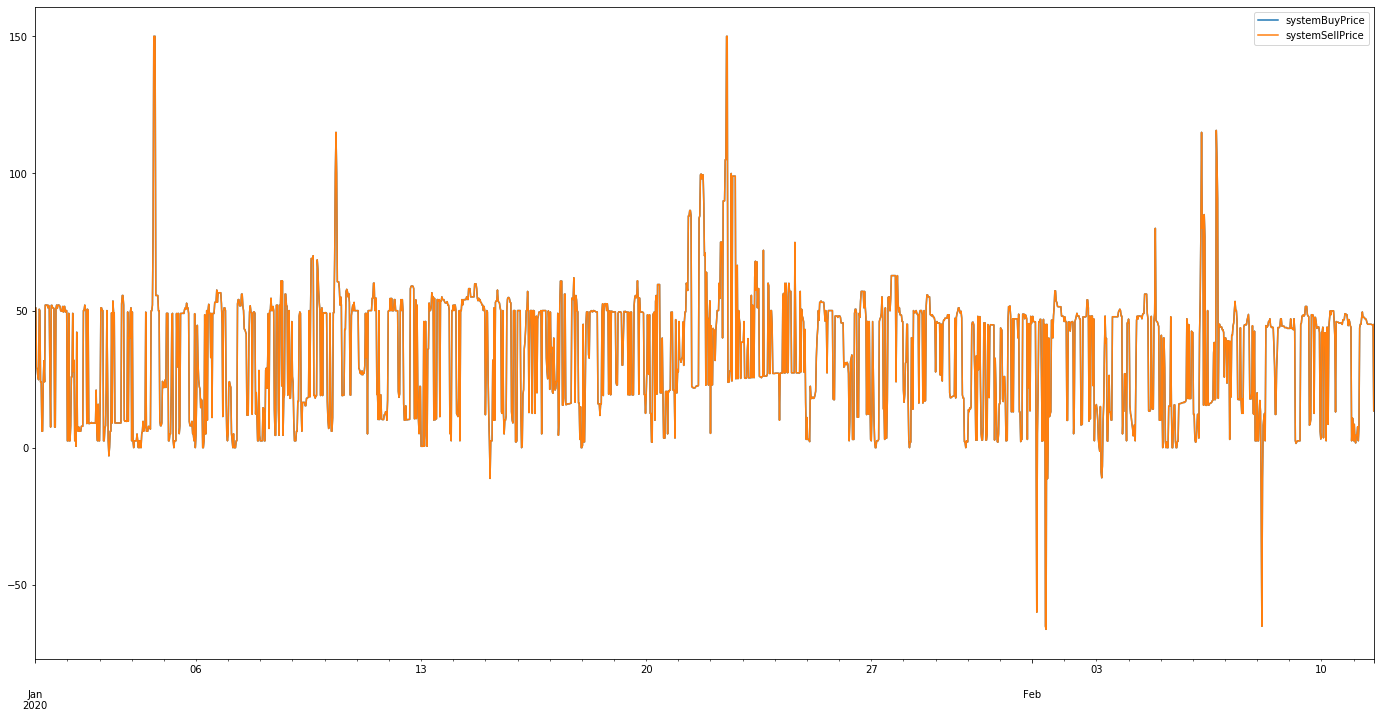

In [76]:
df_prices[['systemBuyPrice','systemSellPrice']].plot(figsize = (24,12))

In [77]:
# Dropping system buy price for now...

#df_prices = df_prices.drop('systemBuyPrice', axis = 1)

In [78]:
# In this case buy price and sell prices are the same... I guess we would see any discrpancies

In [79]:
# Feature engineering...

Text(0, 0.5, 'Net Imbalance Vol')

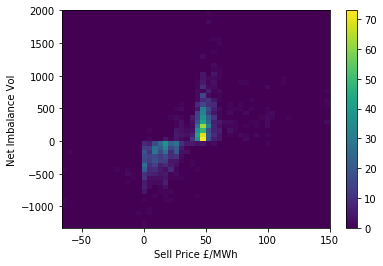

In [80]:
plt.hist2d(df_prices['systemSellPrice'],df_prices['indicativeNetImbalanceVolume'], bins=(50, 50))
plt.colorbar()
plt.xlabel('Sell Price £/MWh')
plt.ylabel('Net Imbalance Vol')

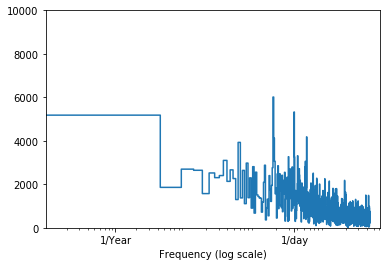

In [81]:
# Looking at sell price frequency info

# Need more data for yearly insights
fft = tf.signal.rfft(df_prices['systemSellPrice'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_prices['systemSellPrice'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 10000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

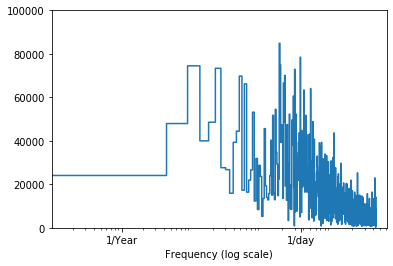

In [82]:
# Looking at NIB frequency info 

# Need more data for yearly insights

fft = tf.signal.rfft(df_prices['indicativeNetImbalanceVolume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_prices['indicativeNetImbalanceVolume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 100000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [83]:
# Splitting data 70-20-10 train-validation-test
# No data shuffling -> doesn't make sense for RNNs and time series...

df = df_prices
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [84]:
train_df

,systemSellPrice,systemBuyPrice,indicativeNetImbalanceVolume
2020-01-01 00:00:00,50.90000,50.90000,54.3365
2020-01-01 00:30:00,51.00000,51.00000,194.7133
2020-01-01 01:00:00,29.37006,29.37006,-71.4292
2020-01-01 01:30:00,28.52000,28.52000,-122.2322
2020-01-01 02:00:00,25.78000,25.78000,-90.9042
...,...,...,...
2020-01-30 01:30:00,14.54000,14.54000,-568.9751
2020-01-30 02:00:00,14.10000,14.10000,-382.2167
2020-01-30 02:30:00,14.90000,14.90000,-122.3002
2020-01-30 03:00:00,44.75000,44.75000,174.8150


In [85]:
val_df 

,systemSellPrice,systemBuyPrice,indicativeNetImbalanceVolume
2020-01-30 04:00:00,45.75,45.75,139.4332
2020-01-30 04:30:00,44.75,44.75,92.2236
2020-01-30 05:00:00,31.72,31.72,-185.3632
2020-01-30 05:30:00,23.56,23.56,-215.7161
2020-01-30 06:00:00,2.75,2.75,-65.0972
...,...,...,...
2020-02-07 09:30:00,17.60,17.60,-63.1413
2020-02-07 10:00:00,17.60,17.60,-31.6009
2020-02-07 10:30:00,17.49,17.49,-221.0705
2020-02-07 11:00:00,17.49,17.49,-125.8180


In [86]:
test_df

,systemSellPrice,systemBuyPrice,indicativeNetImbalanceVolume
2020-02-07 12:00:00,17.45,17.45,-184.8631
2020-02-07 12:30:00,12.50,12.50,-396.0007
2020-02-07 13:00:00,17.80,17.80,-218.0962
2020-02-07 13:30:00,12.50,12.50,-341.6355
2020-02-07 14:00:00,43.95,43.95,74.0929
...,...,...,...
2020-02-11 13:30:00,44.90,44.90,183.9288
2020-02-11 14:00:00,44.80,44.80,102.9414
2020-02-11 14:30:00,44.80,44.80,47.6092
2020-02-11 15:00:00,13.35,13.35,-34.6285


In [87]:
# Data normalisation: subtract mean and dividie by standadrd deviation of training set

train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

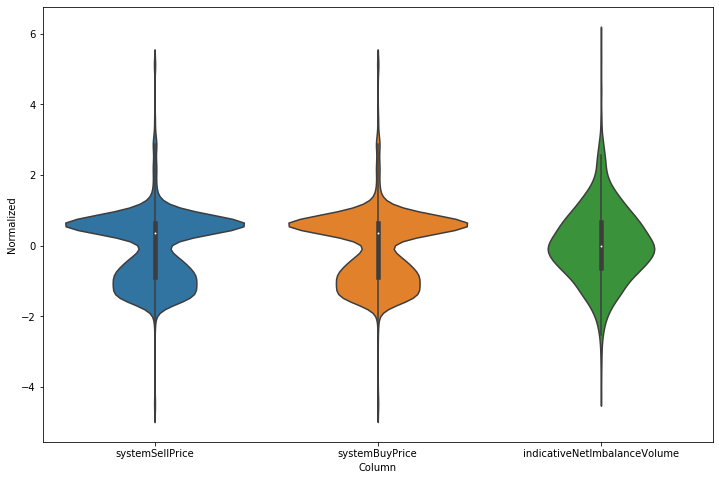

In [88]:
# Looking at distribution of features

df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys())

In [89]:
# Using windowing to set window length, feature width, and timestep offset between them


In [90]:
# Defining window generator class. Needs Tflow 2.3 to work...

class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Storing raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # Make label column indeces
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indeces = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([labels[:,:,self.column_indeces[name]] for name in self.label_columns], axis = 1)
        # Slicing doesn't preserve static shape information, so set the shapes manually
        # This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    
    # The data set could be massive, so this function allows easy window plotting
    def plot(self, model = None, plot_col = 'systemSellPrice', max_subplots = 3):
        inputs, labels =self.example
        plt.figure(figsize = (24,12))
        plot_col_index = self.column_indeces[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3,1, n+1)
            plt.ylabel(f'{plot_col} [NORMALIZED]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], 
                     label = 'Inputs', marker = 'o', zorder = -10)
            
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index
            if label_col_index is None:
                continue
            
        plt.scatter(self.label_indices, labels[n, :, label_col_index],
            edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
        if n ==0:
            plt.legend()
        plt.xlabel('Time (30mins)')
        
    
    # This make_dataset method takes a timeseries and converts it into a tf.data.Dataset of 
    # (input_window, label_window) pairs using new tf.keras.preprocessing.timeseries_dataset_from_array()
    def make_dataset(self,data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data = data,
            targets = None,
            sequence_length = self.total_window_size,
            sequence_stride = 1,
            shuffle = True,
            batch_size = 32,)
        ds = ds.map(self.split_window)
        
        return ds
    
    
    # Adding  properties and accessing them via tf.data.Datasets using make_data
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result
        return result

    

In [91]:
'''WindowGenerator.split_window = split_window
WindowGenerator.plot = plot
WindowGenerator.make_dataset = make_dataset
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example'''

'WindowGenerator.split_window = split_window\nWindowGenerator.plot = plot\nWindowGenerator.make_dataset = make_dataset\nWindowGenerator.train = train\nWindowGenerator.val = val\nWindowGenerator.test = test\nWindowGenerator.example = example'

In [92]:
# Testing window generator for using 24 steps in the past, with 24 steps offset to predict 24th item (1 item only)
#w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     #label_columns=['systemSellPrice'])
#w1

In [93]:
# Testing window generator for using 48 steps in the past, with 1 steps offset to predict 48th item (1 item only)
w2 = WindowGenerator(input_width=48, label_width=1, shift=1,
                     label_columns=['systemSellPrice'])
w2

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48]
Label column name(s): ['systemSellPrice']

In [94]:
# Testing winow splitting with an sample windo size
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 49, 3)
Inputs shape: (3, 48, 3)
labels shape: (3, 1, 1)


In [110]:
#w2.example = example_inputs, example_labels

(<tf.Tensor: shape=(32, 48, 3), dtype=float32, numpy=
 array([[[-1.4345475 , -1.4345475 , -1.0444423 ],
         [ 0.49773115,  0.49773115,  0.16765669],
         [-0.6965244 , -0.6965244 , -0.21262848],
         ...,
         [ 1.5846379 ,  1.5846379 ,  0.34560418],
         [-0.57352054, -0.57352054, -0.25354528],
         [ 1.2715372 ,  1.2715372 ,  0.6845109 ]],
 
        [[ 0.64488846,  0.64488846,  0.1030275 ],
         [ 0.64488846,  0.64488846, -0.07142146],
         [ 0.64533573,  0.64533573,  0.5749985 ],
         ...,
         [ 0.64533573,  0.64533573,  1.0146592 ],
         [ 0.64533573,  0.64533573,  0.9610002 ],
         [ 0.64533573,  0.64533573,  0.9930567 ]],
 
        [[-0.5176097 , -0.5176097 , -0.21033627],
         [ 0.77952176,  0.77952176,  0.21056035],
         [ 1.2156264 ,  1.2156264 ,  1.2780787 ],
         ...,
         [ 0.7213745 ,  0.7213745 ,  0.0162117 ],
         [ 0.9002892 ,  0.9002892 ,  0.76921433],
         [ 0.9002892 ,  0.9002892 ,  1.2993816 ]

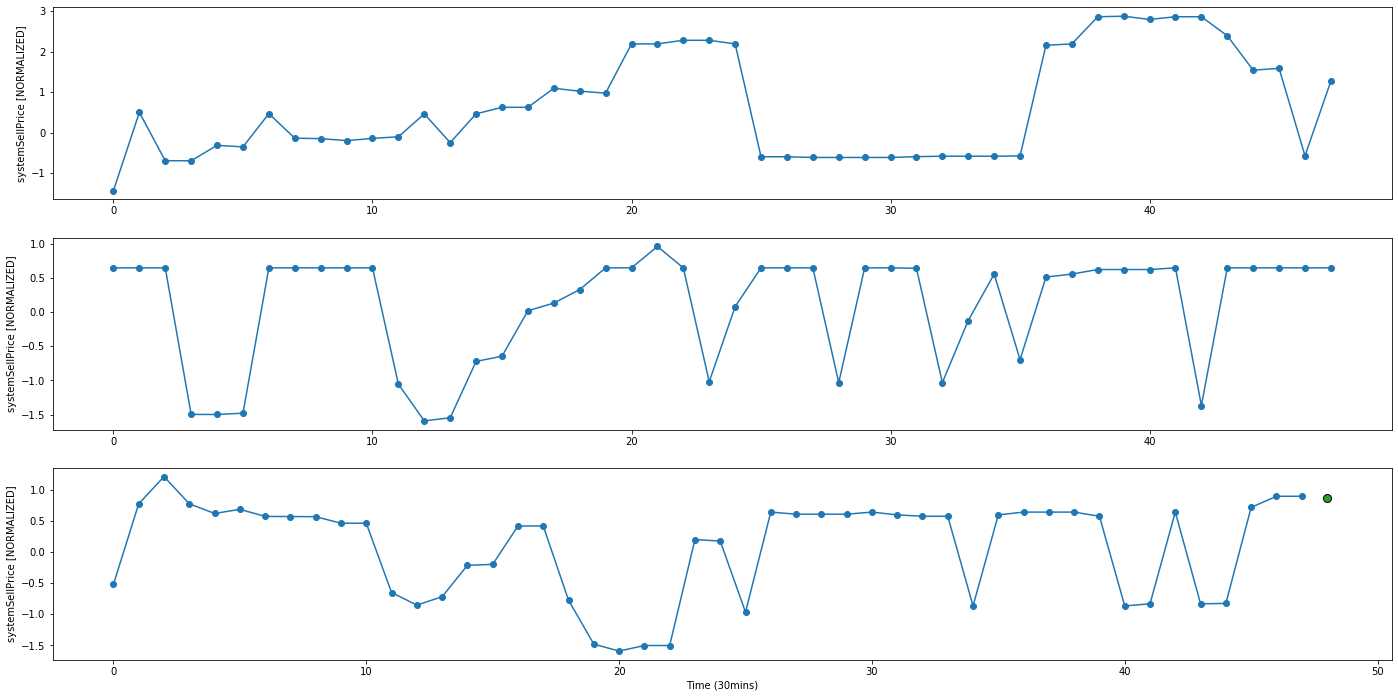

In [96]:
w2.plot()

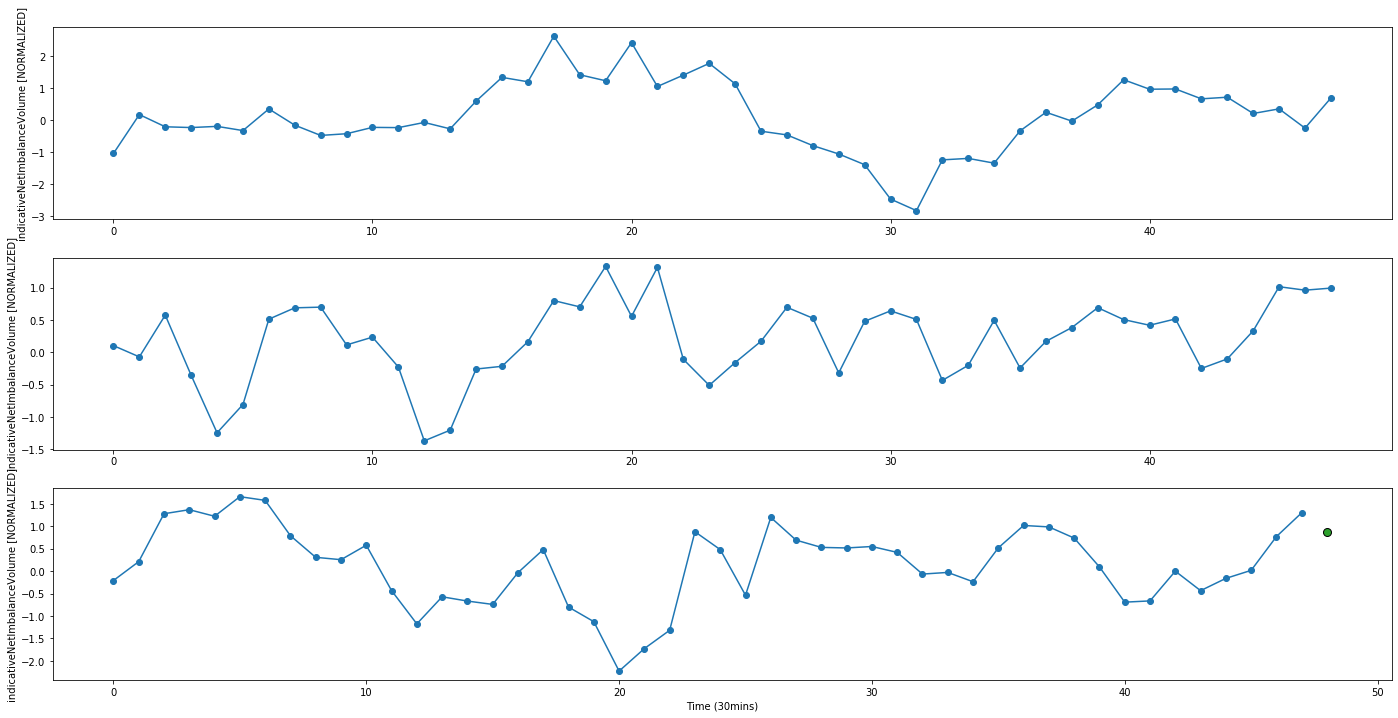

In [97]:
w2.plot(plot_col='indicativeNetImbalanceVolume')

In [98]:
# Each element is an (inputs, label) pair
w2.train.element_spec

(TensorSpec(shape=(None, 48, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, None), dtype=tf.float32, name=None))

In [99]:
# Iterating over a Dataset yields concrete batches:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 48, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [100]:
# Single Step Methods - predict a single timestep

In [101]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['systemSellPrice'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['systemSellPrice']

In [102]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 3)
Labels shape (batch, time, features): (32, 1, 1)


In [103]:
# Setting up baseline for model comparison
# This model will yield on 1 timestep into the future
# Not useful but good for comparison

In [104]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index = None):
        super().__init__()
        self.label_index = label_index
    def call(self,inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [105]:
# Build and define Baseline model for system sell price

baseline = Baseline(label_index = column_indices['systemSellPrice'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                metrics = [tf.metrics.MeanAbsoluteError()])
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4398 - mean_absolute_error: 0.3194


In [106]:
# Creating a wider windo for plotting - over 1 day = 48 periods
# This can be passed into baseline model 

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['systemSellPrice'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['systemSellPrice']

In [107]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 3)
Output shape: (32, 1, 1)


In [113]:
# Plotting

wide_window.plot(baseline)

ValueError: in user code:

    <ipython-input-35-cc9b59e1c4cc>:46 split_window  *
        labels.set_shape([None, self.label_width, None])
    /Users/kieranodonnell/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:755 set_shape  **
        raise ValueError(str(e))

    ValueError: Dimension 1 in both shapes must be equal, but are 1 and 24. Shapes are [?,1,?] and [?,24,?].


In [100]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [101]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 2)
Output shape: (32, 1, 1)


In [102]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [103]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
44/44 [==============================] - 0s 7ms/step - loss: 1.4781 - mean_absolute_error: 1.0092 - val_loss: 1.4296 - val_mean_absolute_error: 0.9572
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 1.3444 - mean_absolute_error: 0.9650 - val_loss: 1.3019 - val_mean_absolute_error: 0.9117
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 1.2258 - mean_absolute_error: 0.9233 - val_loss: 1.1929 - val_mean_absolute_error: 0.8690
Epoch 4/20
44/44 [==============================] - 0s 5ms/step - loss: 1.1235 - mean_absolute_error: 0.8837 - val_loss: 1.0984 - val_mean_absolute_error: 0.8292
Epoch 5/20
44/44 [==============================] - 0s 4ms/step - loss: 1.0343 - mean_absolute_error: 0.8471 - val_loss: 1.0171 - val_mean_absolute_error: 0.7934
Epoch 6/20
44/44 [==============================] - 0s 5ms/step - loss: 0.9584 - mean_absolute_error: 0.8122 - val_loss: 0.9495 - val_mean_absolute_error: 0.7602
Epoch 7/20
44/44 [==========

In [104]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 48, 2)
Output shape: (32, 48, 1)


ValueError: x and y must be the same size

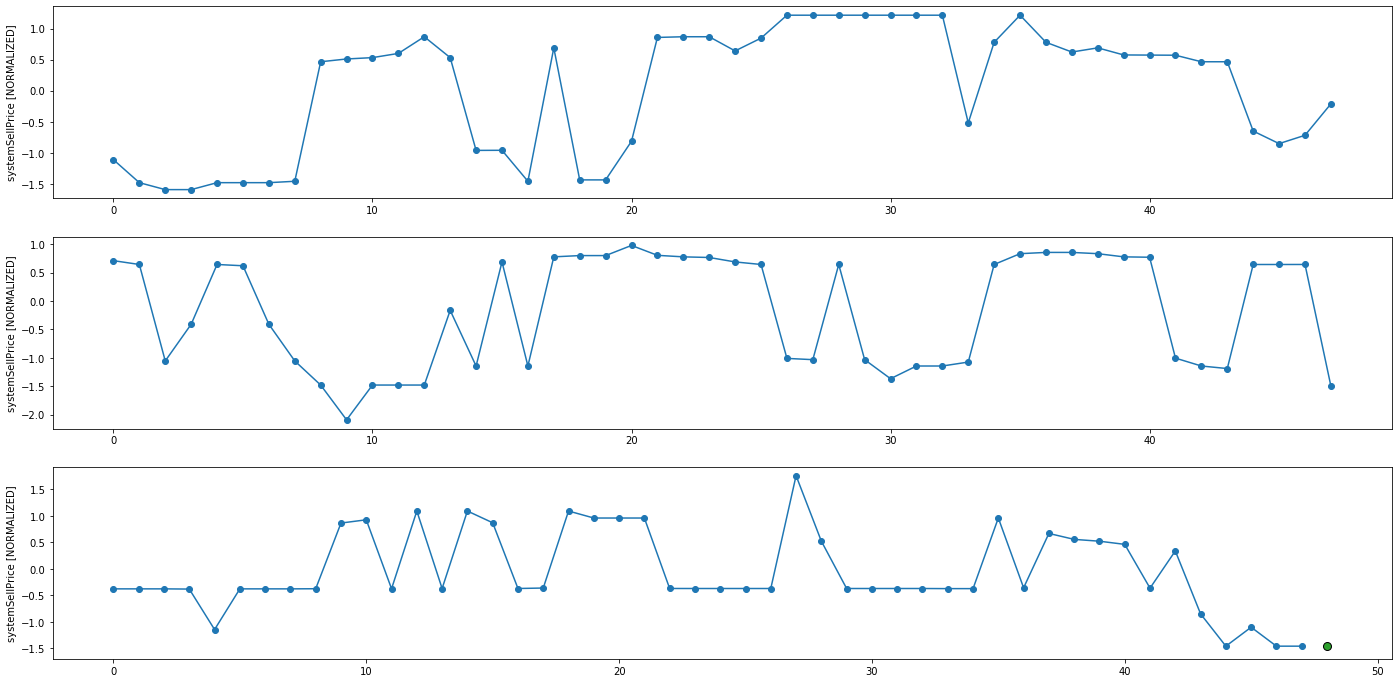

In [105]:
wide_window.plot(linear)

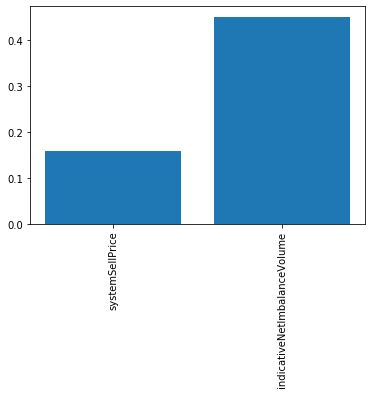

In [106]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)